# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("train.csv", index_col="Customer ID", na_values=[-999])
test = pd.read_csv("test.csv", index_col="Customer ID", na_values=[-999, "?"])
df.head()

,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Customer ID,,,,,,,,,,,,,,,,,,,,,,,
C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1.0,119933.46,54607.18
C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1.0,54791.00,37469.98
C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0.0,72440.58,36474.43
C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1.0,121441.51,56040.54
C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1.0,208567.91,74008.28


In [ ]:
df.shape

(30000, 23)

In [ ]:
df = df.drop(["Name", "Property ID"], axis=1)
test = test.drop(["Name", "Property ID"], axis=1)
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Customer ID,,,,,,,,,,,,,,,,,,,,,
C-36995,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,1933.05,4,Rural,1.0,119933.46,54607.18
C-33999,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1.0,54791.00,37469.98
C-3770,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,988.19,2,Urban,0.0,72440.58,36474.43
C-26480,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1.0,121441.51,56040.54
C-23459,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1.0,208567.91,74008.28


In [ ]:
test.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
Customer ID,,,,,,,,,,,,,,,,,,,,
C-26247,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,3472.69,2,Urban,1.0,236644.50
C-35067,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,1184.84,1,Rural,1.0,142357.30
C-34590,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1266.27,1,Urban,1.0,300991.24
C-16668,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,1369.72,1,Semi-Urban,0.0,125612.10
C-12196,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,1939.23,4,Semi-Urban,1.0,180908.00


In [ ]:
df.dtypes

Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                   float64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [ ]:
test.dtypes

Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                   float64
Property Price                 float64
dtype: object

In [ ]:
df["Property Type"] = df["Property Type"].astype(str)
test["Property Type"] = test["Property Type"].astype(str)

test["Co-Applicant"] = test["Co-Applicant"].astype(float)
test["Property Price"] = test["Property Price"].astype(float)


In [ ]:
df.isna().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     349
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                    168
Property Price                  352
Loan Sanction Amount (USD)      678
dtype: int64

In [ ]:
test.isna().sum()

Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                     77
Property Price                  168
dtype: int64

In [ ]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29651.000000,27507.000000,28297.000000,30000.000000,2.515000e+04,29832.000000,2.964800e+04,29322.000000
mean,40.092300,2.630574e+03,88826.333855,409.293722,2.253027,739.885381,0.193933,2.631119e+03,0.855323,1.333359e+05,48210.120452
std,16.045129,1.126272e+04,59536.949605,217.738726,0.951162,72.163846,0.395384,1.132268e+04,0.351781,9.297139e+04,48212.938805
min,18.000000,3.777000e+02,6048.240000,33.760000,1.000000,580.000000,0.000000,3.777000e+02,0.000000,7.265950e+03,0.000000
25%,25.000000,1.650457e+03,41177.755000,250.745000,2.000000,681.880000,0.000000,1.650450e+03,1.000000,6.192126e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,376.530000,2.000000,739.820000,0.000000,2.223250e+03,1.000000,1.112765e+05,36064.225000
75%,55.000000,3.090593e+03,119964.605000,522.470000,3.000000,799.120000,0.000000,3.091407e+03,1.000000,1.800713e+05,74779.277500
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.777460e+06,1.000000,1.077967e+06,481907.320000


In [ ]:
# cleaning traing data

df["Income (USD)"] = df["Income (USD)"].fillna(value= df["Income (USD)"].median())
df["Current Loan Expenses (USD)"] = df["Current Loan Expenses (USD)"].fillna(value= df["Current Loan Expenses (USD)"].mean())

df["Dependents"] = df["Dependents"].fillna(value= df["Dependents"].mode()[0])
df["Credit Score"] = df["Credit Score"].fillna(value= df["Credit Score"].median())


df["Property Age"] = df["Property Age"]/365
df["Property Age"] = df["Property Age"].fillna(value= df["Property Age"].median())

df["Gender"] = df["Gender"].fillna(value= df["Gender"].mode()[0])
df["Co-Applicant"] = df["Co-Applicant"].fillna(value= df["Co-Applicant"].mode()[0])

df["Income Stability"]  = df["Income Stability"].fillna(df["Profession"] == "Pensioner")
df['Income Stability'] = df['Income Stability'].replace(True, "High")
df['Income Stability'] = df['Income Stability'].replace(False, "Low")

df["Has Active Credit Card"] = df["Has Active Credit Card"].replace("Unpossessed", "Inactive")
df["Has Active Credit Card"] = df["Has Active Credit Card"].fillna(df["Has Active Credit Card"].mode()[0])

df["Property Location"] = df["Property Location"].fillna(df["Property Location"].mode()[0])

df["Type of Employment"] = df["Type of Employment"].replace(["Sales staff","Core staff", "Managers", "Accountants", "High skill tech staff",
                                                            "IT staff", "HR staff" ],  "Regular_Emp")
df["Type of Employment"] = df["Type of Employment"].replace(["Laborers","Drivers", "Security staff", "Cooking staff", "Cleaning staff",
                                                            "Low-skill Laborers", "Waiters/barmen staff" ],  "Helpers_Emp")
df["Type of Employment"] = df["Type of Employment"].replace(["Private service staff","Secretaries", "Realty agents" ],  "External_Emp")

df['Type of Employment'] = df['Type of Employment'].replace("Student", "Pensioner")
df["Type of Employment"]  = df["Type of Employment"].fillna(df["Profession"] == "Pensioner")
df['Type of Employment'] = df['Type of Employment'].replace(True, "Non_Emp")
df['Type of Employment'] = df['Type of Employment'].replace(False, "Helpers_Emp")


## cleaning testing data
test["Income (USD)"] = test["Income (USD)"].fillna(value= df["Income (USD)"].median())
test["Current Loan Expenses (USD)"] = test["Current Loan Expenses (USD)"].fillna(value= test["Current Loan Expenses (USD)"].mean())

test["Dependents"] = test["Dependents"].fillna(value= test["Dependents"].mode()[0])
test["Credit Score"] = test["Credit Score"].fillna(value= test["Credit Score"].median())


test["Property Age"] = test["Property Age"]/365
test["Property Age"] = test["Property Age"].fillna(value= test["Property Age"].median())

test["Gender"] = test["Gender"].fillna(value= test["Gender"].mode()[0])
test["Co-Applicant"] = test["Co-Applicant"].fillna(value= test["Co-Applicant"].mode()[0])

test["Income Stability"]  = test["Income Stability"].fillna(test["Profession"] == "Pensioner")
test['Income Stability'] = test['Income Stability'].replace(True, "High")
test['Income Stability'] = test['Income Stability'].replace(False, "Low")

test["Has Active Credit Card"] = test["Has Active Credit Card"].replace("Unpossessed", "Inactive")
test["Has Active Credit Card"] = test["Has Active Credit Card"].fillna(test["Has Active Credit Card"].mode()[0])

test["Property Location"] = test["Property Location"].fillna(test["Property Location"].mode()[0])

test["Type of Employment"] = test["Type of Employment"].replace(["Sales staff","Core staff", "Managers", "Accountants", "High skill tech staff",
                                                            "IT staff", "HR staff" ],  "Regular_Emp")
test["Type of Employment"] = test["Type of Employment"].replace(["Laborers","Drivers", "Security staff", "Cooking staff", "Cleaning staff",
                                                            "Low-skill Laborers", "Waiters/barmen staff" ],  "Helpers_Emp")
test["Type of Employment"] = test["Type of Employment"].replace(["Private service staff","Secretaries", "Realty agents" ],  "External_Emp")


test["Type of Employment"]  = test["Type of Employment"].fillna(test["Profession"] == "Pensioner")
test['Type of Employment'] = test['Type of Employment'].replace(True, "Non_Emp")
test['Type of Employment'] = test['Type of Employment'].replace(False, "Helpers_Emp")

In [ ]:
test["Type of Employment"].value_counts()

Helpers_Emp       8988
Regular_Emp       8262
Non_Emp           1764
Medicine staff     598
External_Emp       388
Name: Type of Employment, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc34de0a090>,
      dtype=object)

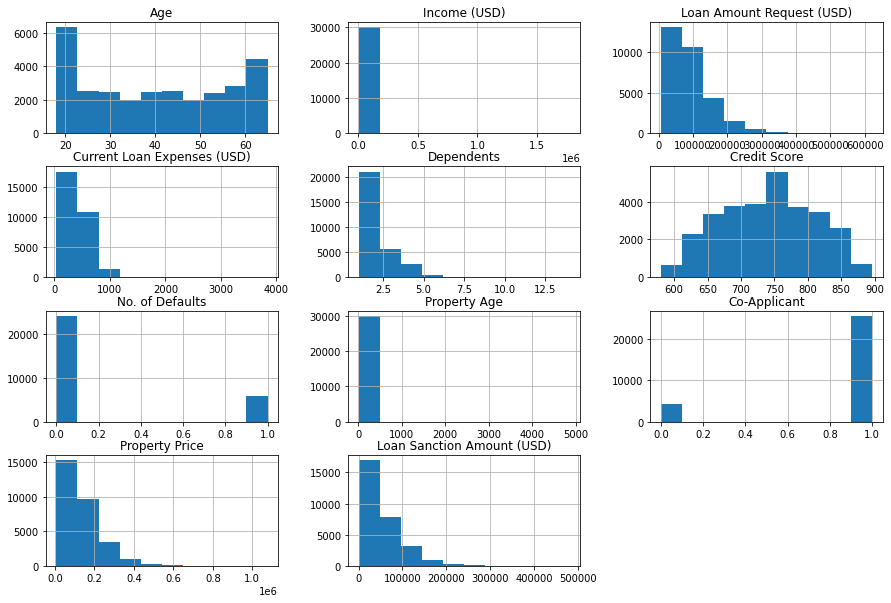

In [ ]:
df.hist(figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc34eafbb10>,
      dtype=object)

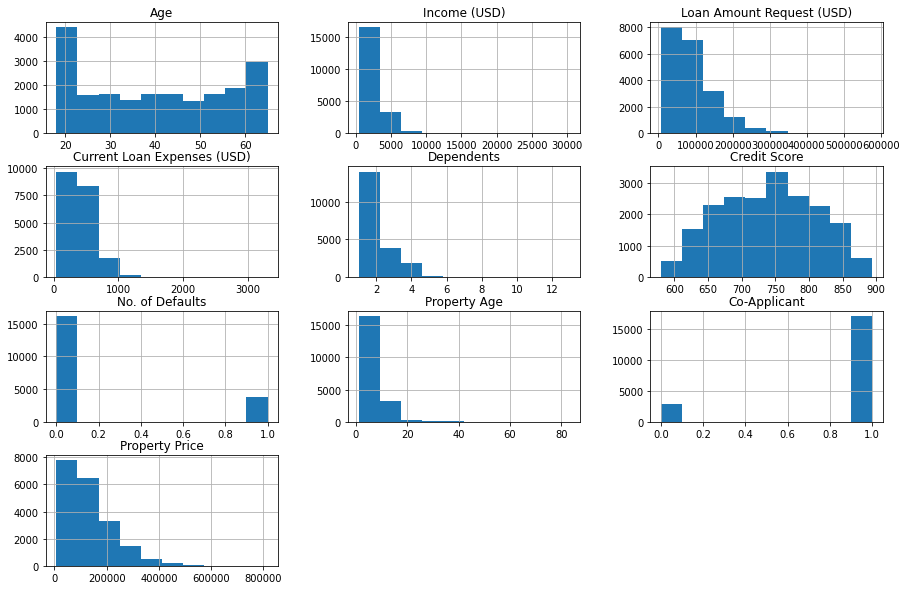

In [ ]:
test.hist(figsize=(15, 10))

In [ ]:
# cleaning traing data
df = df[ df["Loan Sanction Amount (USD)"] > 0]

df["Loan Sanction Amount (USD)"] = np.log(df["Loan Sanction Amount (USD)"])

df["Income (USD)"] = np.log(df["Income (USD)"])
df["Loan Amount Request (USD)"] = np.log(df["Loan Amount Request (USD)"])
df["Current Loan Expenses (USD)"] = df["Current Loan Expenses (USD)"]**0.5
df["Property Price"] = np.log(df["Property Price"])
df["Property Age"] = np.log(df["Property Age"])
df["Credit Score"]  = np.log(df["Credit Score"])

# cleaning testing data
test["Income (USD)"] = np.log(test["Income (USD)"])
test["Loan Amount Request (USD)"] = np.log(test["Loan Amount Request (USD)"])
test["Current Loan Expenses (USD)"] = test["Current Loan Expenses (USD)"]**0.5
test["Property Price"] = np.log(test["Property Price"])
test["Property Age"] = np.log(test["Property Age"])
test["Credit Score"]  = np.log(test["Credit Score"])

In [ ]:
## cleaing training data
df = df[ df["Loan Sanction Amount (USD)"] < 420]
#df = df[ df["Loan Sanction Amount (USD)"] > 0]
df =  df[df["Income (USD)"] < 9]
df =  df[df["Income (USD)"] > 6.6]
df = df[df["Current Loan Expenses (USD)"] < 31]

df = df[df["Dependents"] <= 4]
df = df[df["Loan Amount Request (USD)"] > 10]
df = df[df["Property Age"] > 1]
df = df[df["Property Age"] < 2.8]
df = df[df["Property Price"] > 10.5]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


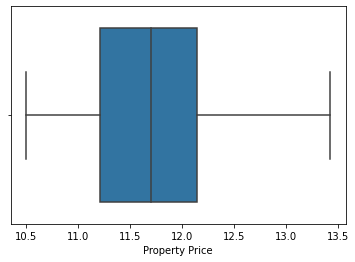

In [ ]:
#df = df[df["Property Age"] < 2.8]
sns.boxplot(df["Property Price"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc34ea4a910>,
      dtype=object)

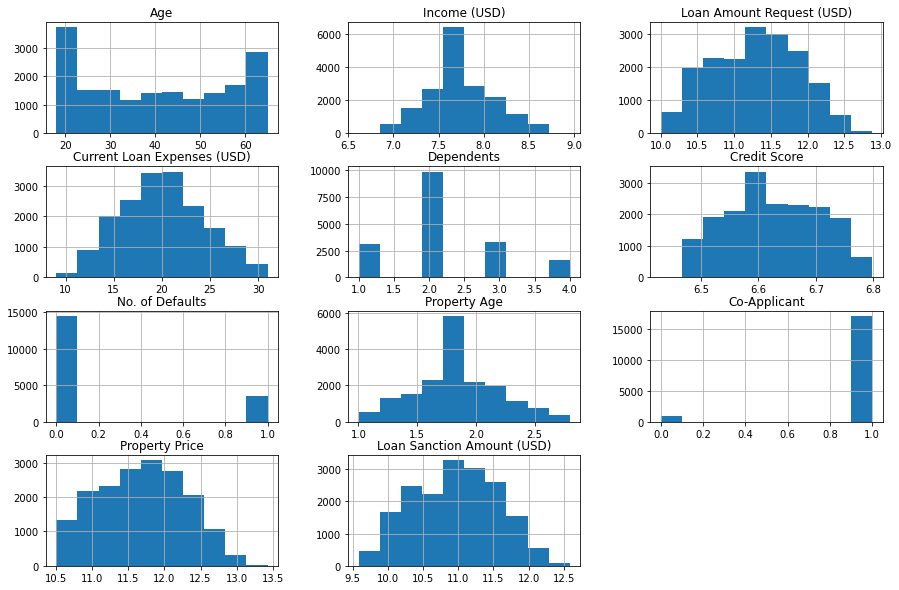

In [ ]:
df.hist(figsize=(15, 10))

In [ ]:
df.corr()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Age,1.000000,-0.041544,-0.013368,-0.030924,-0.089146,0.134743,0.002046,-0.042435,-0.279731,-0.015356,-0.002257
Income (USD),-0.041544,1.000000,0.287705,0.351129,-0.008326,0.062859,-0.001866,0.990854,0.033177,0.279534,0.287480
Loan Amount Request (USD),-0.013368,0.287705,1.000000,0.764622,0.037276,0.122033,-0.007603,0.285546,-0.000685,0.965763,0.992324
Current Loan Expenses (USD),-0.030924,0.351129,0.764622,1.000000,0.057879,0.066661,-0.008813,0.347638,0.024237,0.739658,0.756245
Dependents,-0.089146,-0.008326,0.037276,0.057879,1.000000,-0.128473,0.003922,-0.009516,0.110881,0.034899,0.025112
Credit Score,0.134743,0.062859,0.122033,0.066661,-0.128473,1.000000,0.001147,0.062191,-0.207367,0.117462,0.197481
No. of Defaults,0.002046,-0.001866,-0.007603,-0.008813,0.003922,0.001147,1.000000,-0.002505,0.091992,-0.007194,-0.008639
Property Age,-0.042435,0.990854,0.285546,0.347638,-0.009516,0.062191,-0.002505,1.000000,0.033210,0.277653,0.285391
Co-Applicant,-0.279731,0.033177,-0.000685,0.024237,0.110881,-0.207367,0.091992,0.033210,1.000000,0.000083,-0.021362
Property Price,-0.015356,0.279534,0.965763,0.739658,0.034899,0.117462,-0.007194,0.277653,0.000083,1.000000,0.958703


In [ ]:
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Customer ID,,,,,,,,,,,,,,,,,,,,,
C-36995,F,56,7.566854,Low,Working,Regular_Emp,Semi-Urban,11.195603,15.526751,N,N,3.0,6.696343,0,Inactive,1.666957,4,Rural,1.0,11.694692,10.907921
C-33999,M,32,8.507731,Low,Working,Helpers_Emp,Semi-Urban,10.754439,22.266791,N,Y,1.0,6.659807,0,Inactive,2.607833,2,Rural,1.0,10.911281,10.531295
C-26480,F,65,7.706359,High,Pensioner,Non_Emp,Rural,11.290506,17.278310,N,Y,2.0,6.724673,1,Inactive,1.806828,2,Semi-Urban,1.0,11.707188,10.933831
C-23459,F,31,7.868931,Low,Working,Regular_Emp,Semi-Urban,11.642715,22.167769,N,Y,2.0,6.614122,1,Active,1.969034,4,Semi-Urban,1.0,12.248020,11.211932
C-17688,F,60,7.118761,Low,State servant,External_Emp,Rural,10.446821,13.471451,N,N,2.0,6.528133,1,Inactive,1.218864,2,Rural,1.0,10.672364,10.016038


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17942 entries, C-36995 to C-33003
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       17942 non-null  object 
 1   Age                          17942 non-null  int64  
 2   Income (USD)                 17942 non-null  float64
 3   Income Stability             17942 non-null  object 
 4   Profession                   17942 non-null  object 
 5   Type of Employment           17942 non-null  object 
 6   Location                     17942 non-null  object 
 7   Loan Amount Request (USD)    17942 non-null  float64
 8   Current Loan Expenses (USD)  17942 non-null  float64
 9   Expense Type 1               17942 non-null  object 
 10  Expense Type 2               17942 non-null  object 
 11  Dependents                   17942 non-null  float64
 12  Credit Score                 17942 non-null  float64
 13  No. of Defaul

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, C-26247 to C-43482
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Income (USD)                 20000 non-null  float64
 3   Income Stability             20000 non-null  object 
 4   Profession                   20000 non-null  object 
 5   Type of Employment           20000 non-null  object 
 6   Location                     20000 non-null  object 
 7   Loan Amount Request (USD)    20000 non-null  float64
 8   Current Loan Expenses (USD)  20000 non-null  float64
 9   Expense Type 1               20000 non-null  object 
 10  Expense Type 2               20000 non-null  object 
 11  Dependents                   20000 non-null  float64
 12  Credit Score                 20000 non-null  float64
 13  No. of Defaul

In [ ]:
# cleaning traing data
df['Gender'] = df['Gender'].map(dict(M=1, F=0))
df['Income Stability'] = df['Income Stability'].map(dict(High=1, Low=0))
df['Expense Type 1'] = df['Expense Type 1'].map(dict(Y=1, N=0))
df['Expense Type 2'] = df['Expense Type 2'].map(dict(Y=1, N=0))
df['Has Active Credit Card'] = df['Has Active Credit Card'].map(dict(Active=1, Inactive=0))

## cleaing testing data
test["Property Price"] = test["Property Price"].fillna(value= test["Property Price"].median())

test['Gender'] = test['Gender'].map(dict(M=1, F=0))
test['Income Stability'] = test['Income Stability'].map(dict(High=1, Low=0))
test['Expense Type 1'] = test['Expense Type 1'].map(dict(Y=1, N=0))
test['Expense Type 2'] = test['Expense Type 2'].map(dict(Y=1, N=0))
test['Has Active Credit Card'] = test['Has Active Credit Card'].map(dict(Active=1, Inactive=0))

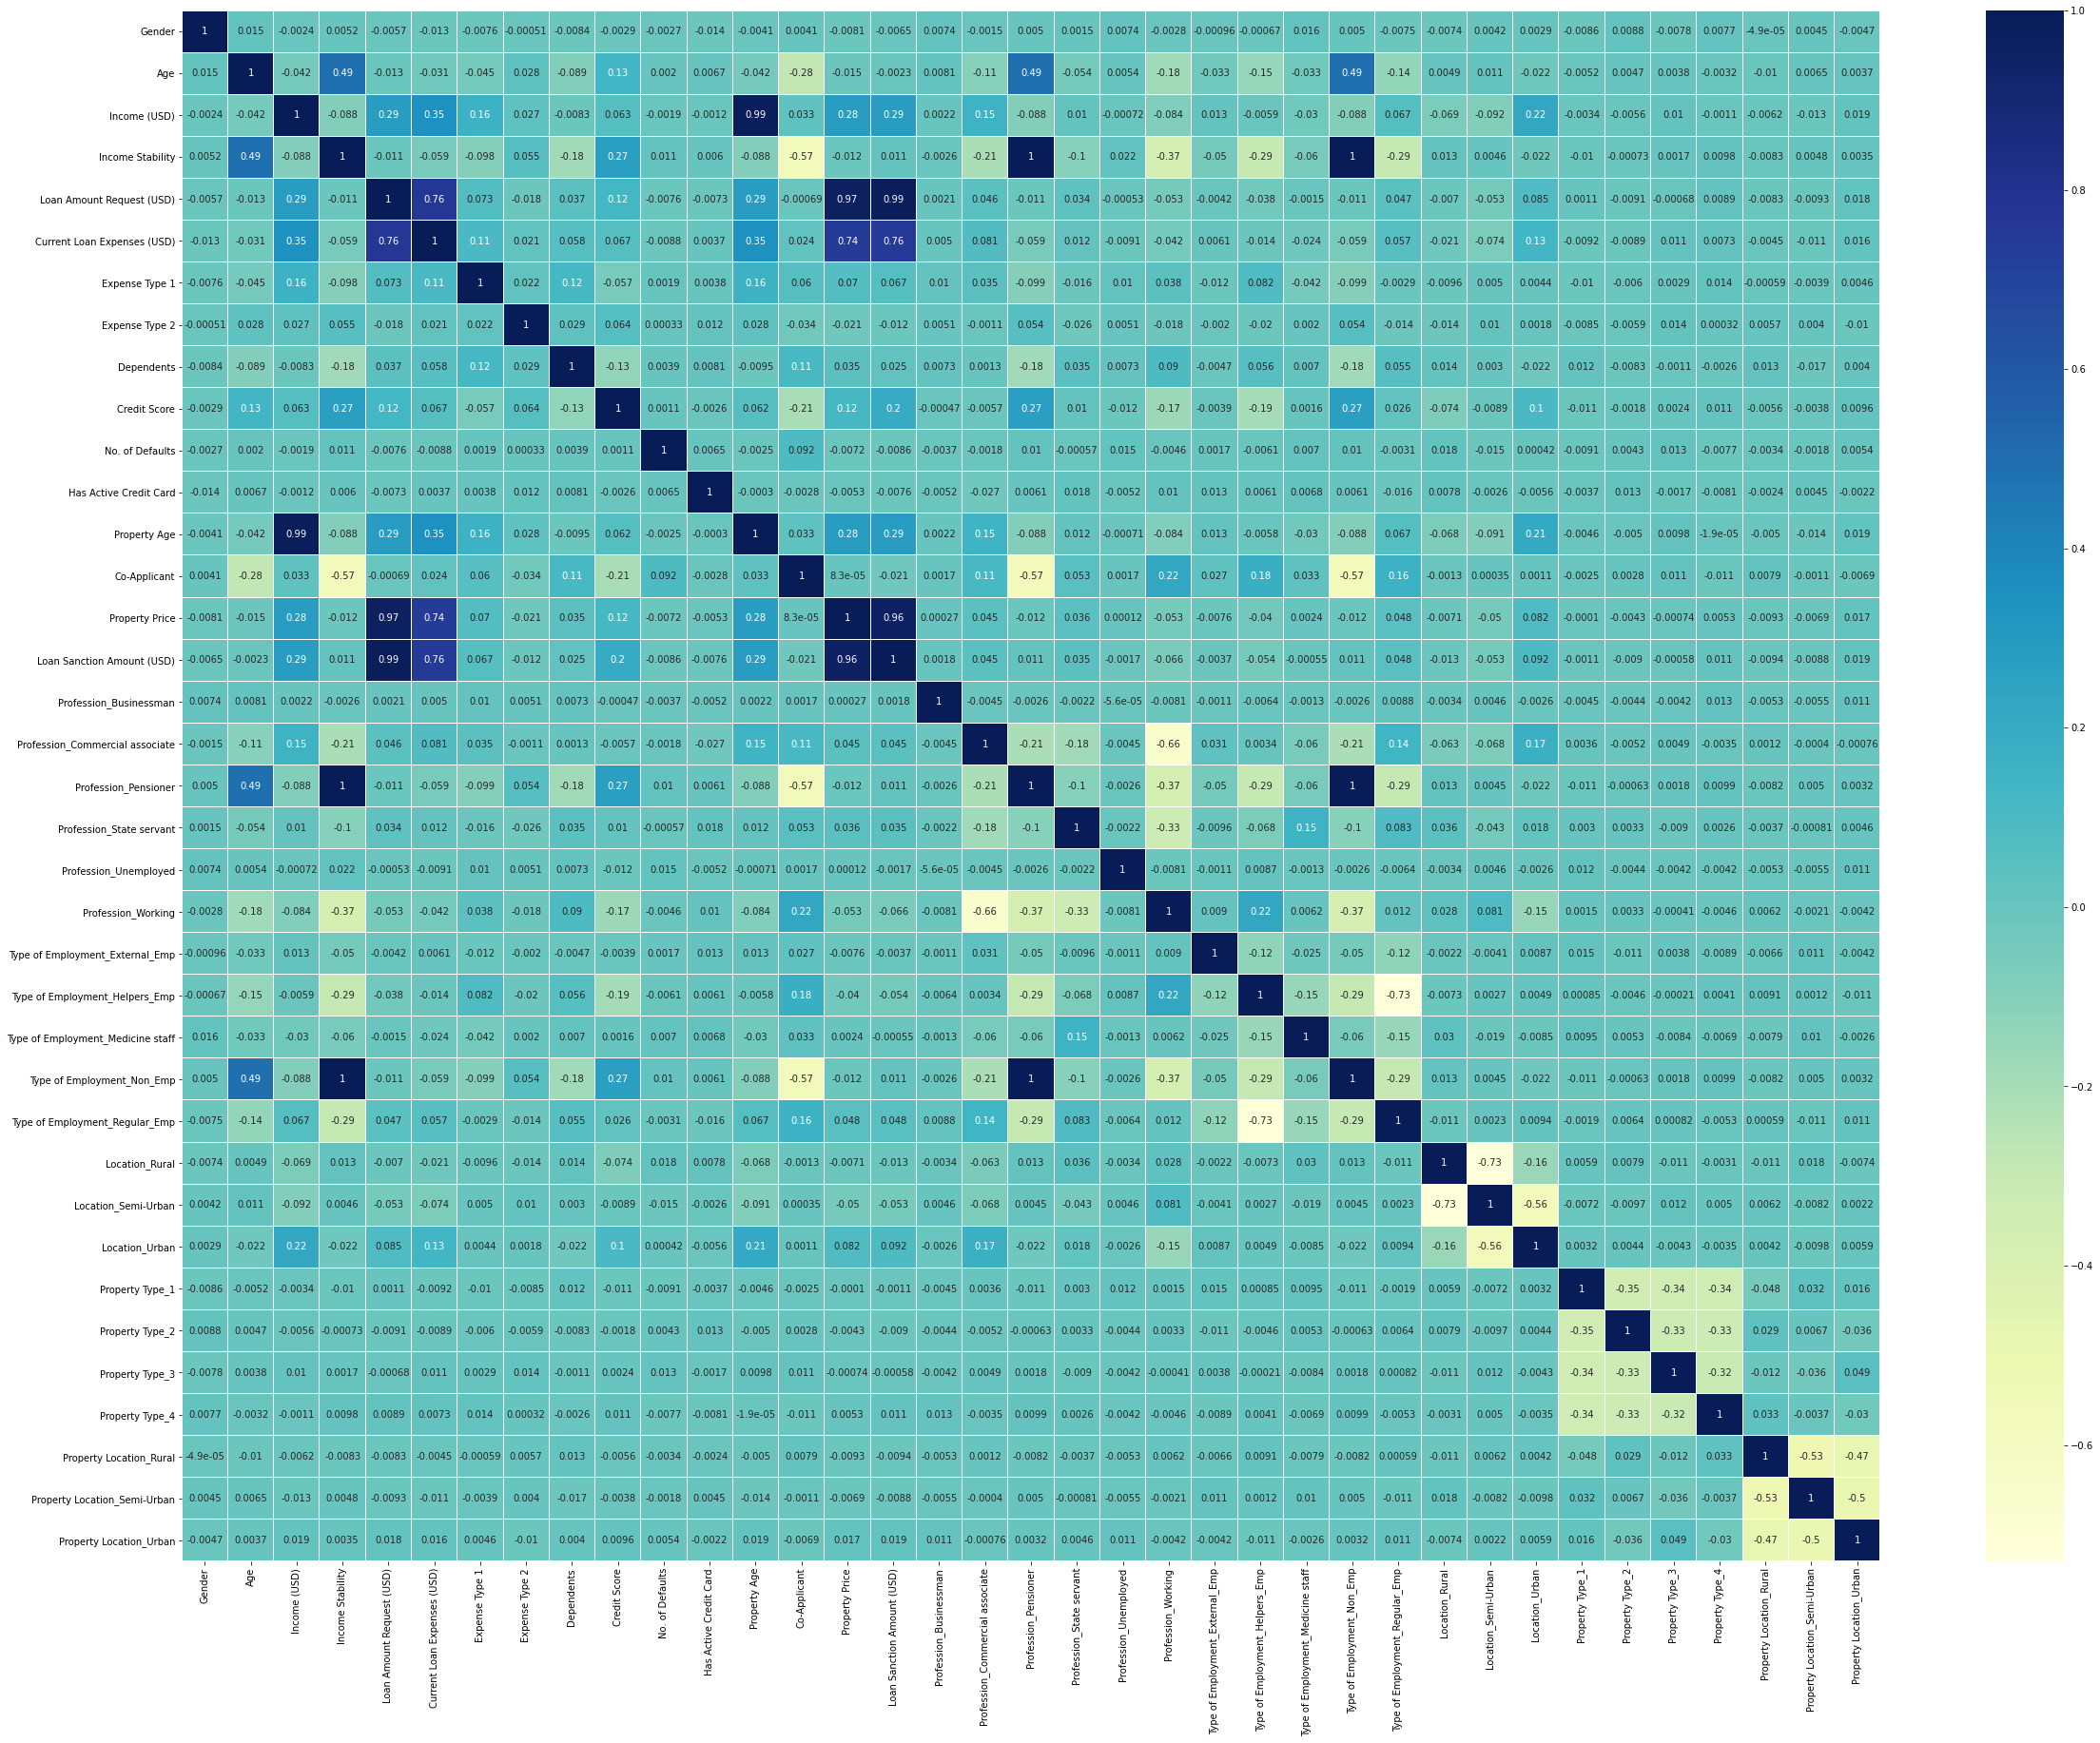

In [ ]:
df = pd.get_dummies(df)
plt.subplots(figsize=(40,30))
sns.heatmap(df.corr(), cmap='YlGnBu', linewidth=.005, annot=True)


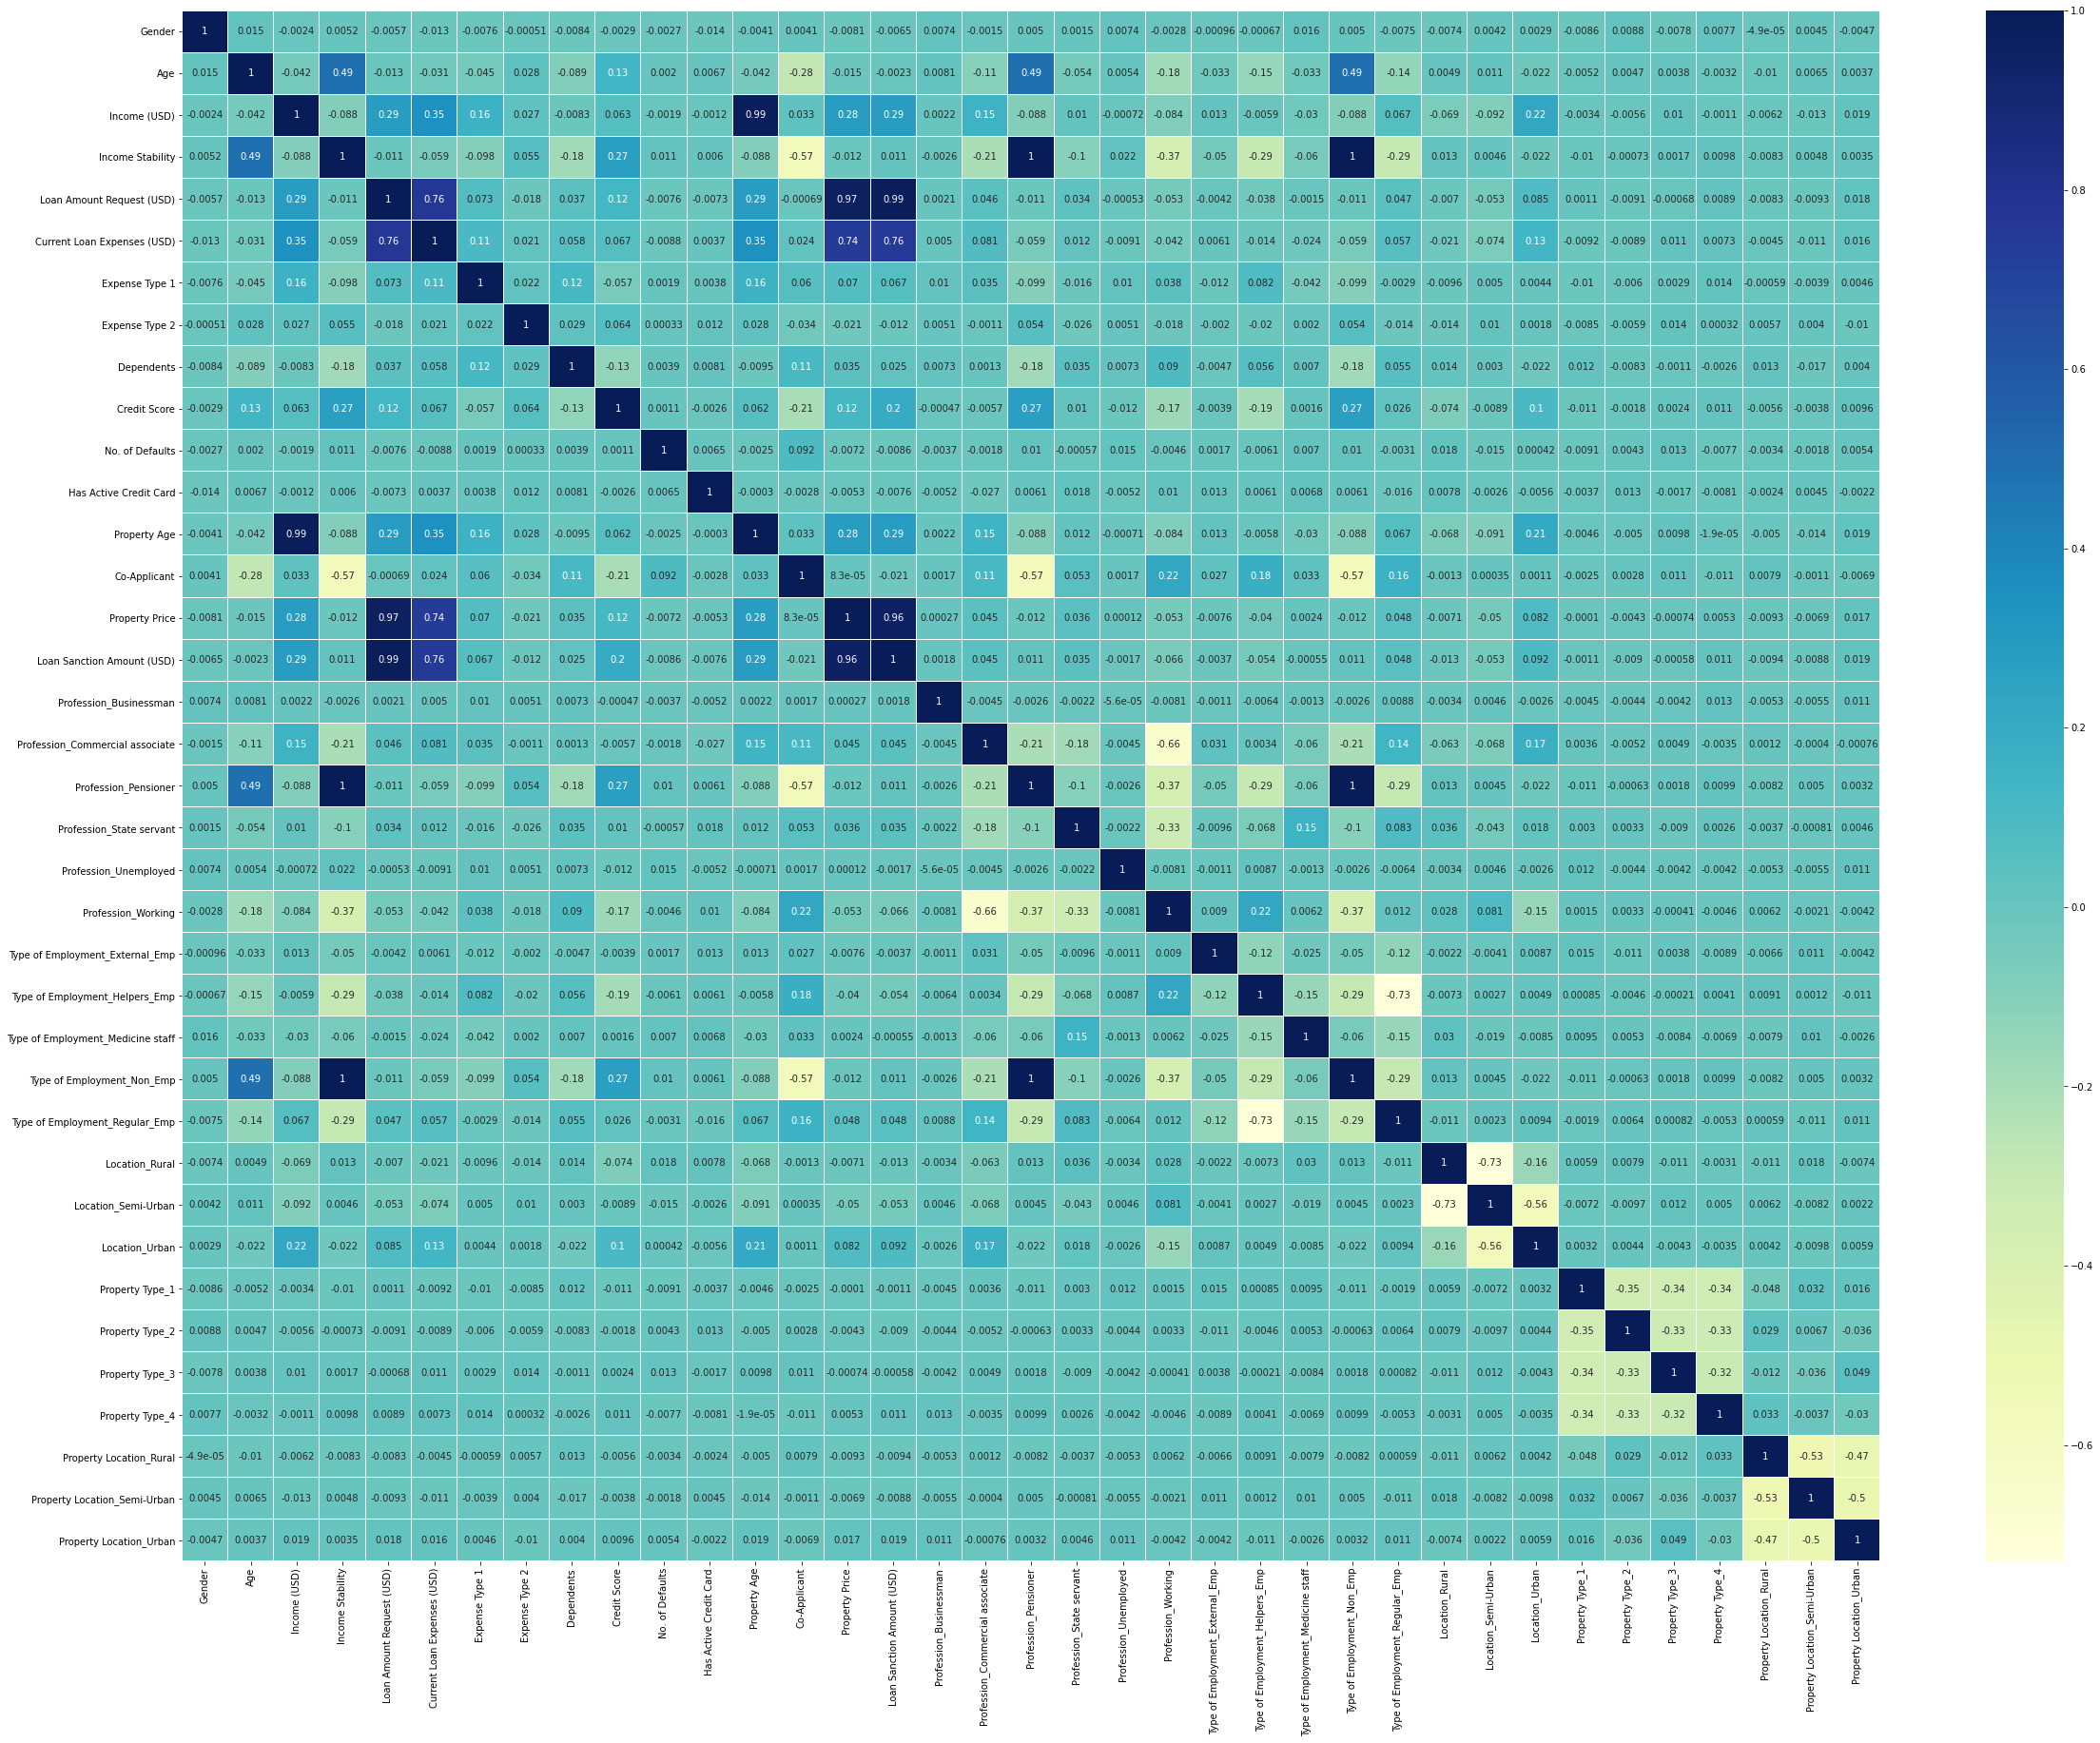

In [ ]:

test = pd.get_dummies(test)
plt.subplots(figsize=(40,30))
sns.heatmap(df.corr(), cmap='YlGnBu', linewidth=.005, annot=True)

In [ ]:
x = df.drop(["Loan Sanction Amount (USD)"], axis=1)
y = df["Loan Sanction Amount (USD)"]

In [ ]:
x = x.values
y = y.values

In [ ]:
# train and test dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state = 48)

In [ ]:
test = test.drop(["Profession_Student"], axis=1)

In [ ]:
test.dtypes

Gender                                 int64
Age                                    int64
Income (USD)                         float64
Income Stability                       int64
Loan Amount Request (USD)            float64
Current Loan Expenses (USD)          float64
Expense Type 1                         int64
Expense Type 2                         int64
Dependents                           float64
Credit Score                         float64
No. of Defaults                        int64
Has Active Credit Card                 int64
Property Age                         float64
Co-Applicant                         float64
Property Price                       float64
Profession_Commercial associate        uint8
Profession_Maternity leave             uint8
Profession_Pensioner                   uint8
Profession_State servant               uint8
Profession_Unemployed                  uint8
Profession_Working                     uint8
Type of Employment_External_Emp        uint8
Type of Em

# Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-4.094342091448668

[-6.48102625e-04 -3.91688971e-05 -7.57863817e-03 -5.74626209e-03
  1.00115840e+00 -1.11600811e-04 -1.28054992e-04  5.48822310e-04
 -8.50735946e-04  5.73445256e-01 -6.97405677e-04 -2.40194210e-04
  7.44320194e-03 -1.90024943e-02  8.99333278e-04 -1.35705964e-02
  5.03998313e-03  2.79813094e-03  8.64443855e-03 -8.54439303e-03
  5.63243684e-03 -5.21365164e-04 -1.54337459e-03 -1.52059869e-04
  2.79813094e-03 -5.81331316e-04 -7.57141018e-04  1.99120736e-04
  5.58020283e-04 -1.83826394e-03  6.65231119e-05 -3.16947244e-04
  2.08868807e-03 -2.23151552e-04 -1.32403147e-04  3.55554699e-04]

[100.85443079 122.81818819 102.4817494  ... 119.14884126 105.38941173
 120.01201154]
The output of the predicted values are: [100.85443079 122.81818819 102.4817494  101.46986467]



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


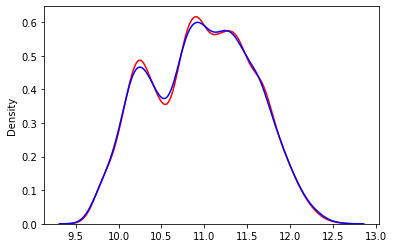

In [ ]:
# Create linear regression:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr)
print("")

# coefficients of linear regression 
print(lr.intercept_)
print("")
print(lr.coef_)
print("")

# linear regression predictions:
lr_pred = lr.predict(x_train)
lr_pred_output = lr_pred**2
print(lr_pred_output)
print("The output of the predicted values are:", lr_pred_output[0:4])
print("")



# View distribution of actual salaries compared to predicted salaries
sns.distplot(lr_pred, hist=False, color="red")
sns.distplot(y_train, hist=False, color="blue")

print("")


In [ ]:
# Print MSE of training data
print("The mean squared error of our prediciton model is:", mean_squared_error(y_train, lr_pred))
print("")

# Print accuracy score using 5-fold cross validation
scores = cross_val_score(lr, x_train, y_train, cv=5)
print("5-Fold Cross Validation Accuracy of training data:", (np.mean(scores)), (np.std(scores)))
print("")

score = max(0, 100*metrics.r2_score(y_train, lr_pred))
score

The mean squared error of our prediciton model is: 0.0033800257222274506

5-Fold Cross Validation Accuracy of training data: 0.9905238515954519 0.00019062760121192951



99.05741583307905

In [ ]:
# predicting with test data
print("Model prediction is")
prediction = lr.predict(test)
prediction

Model prediction is


array([11.50819936, 11.27835073, 11.6394574 , ...,  9.43504079,
       11.20854523, 11.34523363])

In [ ]:
predict_lr = np.exp(prediction)
predict_lr


AttributeError: ignored

In [ ]:
output = pd.DataFrame(predict_lr, columns=['Loan Sanction Amount (USD)'])
output.head()

test["Loan Sanction Amount (USD)"] = predict_lr
test1 = test

test1
test_data = test1["Loan Sanction Amount (USD)"]

print(test_data)
print("")
print(score)

final_rez = pd.DataFrame(test_data).to_csv("final_result.csv", index=True, encoding = 'utf-8')
final_rez